### Adaline With Stochastic Gradient Descent

Imports

In [63]:
import numpy as np

In [64]:
class AdalineSTG:

    """
    Parameters
    ----------
    eta: is the learning rate, can go from 0.00 to 1.00
    n_iter: is the number of iterations, the maximum number of iterations is called epochs
    random_state: is the seed for the numpy random number generator for initializing the weights
    shuffle: bool Shuffles training data every epoch if True to prevent cycles
    Attributes
    ----------
    
    w_ : the weights vector
    b_ : the bias value
    
    
    
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=None, shuffle=True):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.shuffle = shuffle
        self.weights_initialized = False
        
    
    
    def fit(self, X, y):
        """
        Fit training data
        :param X: shape is (n_examples, n_features)
        :param y: shape is (n_examples), is the target values array
        """
    
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            
            losses = []
            for xi, target in zip(X, y):
                losses.append(self.update_weights(xi, target))
                
            avg_loss = np.mean(losses)
            print(avg_loss)
            self.losses_.append(avg_loss)    
        
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        return X
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
        
    def _initialize_weights(self, m):
        """Initialize weights to a small random number"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float32(0.)
        self.weights_initialized = True
        
    def update_weights(self, xi, target):
        """Apply Adaline rule only to one sample"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * error
        self.b_ += self.eta * 2.0 * error
        
        loss = error**2
        return loss
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

### Training

Loading dataset

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(s, header=None, encoding=u'utf-8')

print(df.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


Extracting only useful features

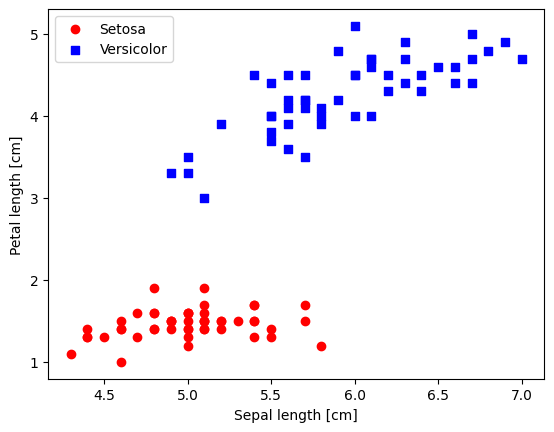

In [67]:
# Select only setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# Extract sepal and petal length
X = df.iloc[0:100, [0, 2]].values

# Plot data
plt.scatter(X[:50, 0], X[:50, 1], c='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], c='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Training

2024-09-22 16:38:54.023979
0.17629895945552454
0.10159113626786256
0.06880521505213098
0.04973533498878565
0.03573521713732666
0.028050917755369456
0.022390784902922414
0.019126570358450265
0.016950754365052677
0.014875307844477588
0.014973504767486807
0.014253000043927676
0.01378587881674615
0.013809873925810687
0.013705026788400196
2024-09-22 16:38:54.033360
total time:  0:00:00.009381


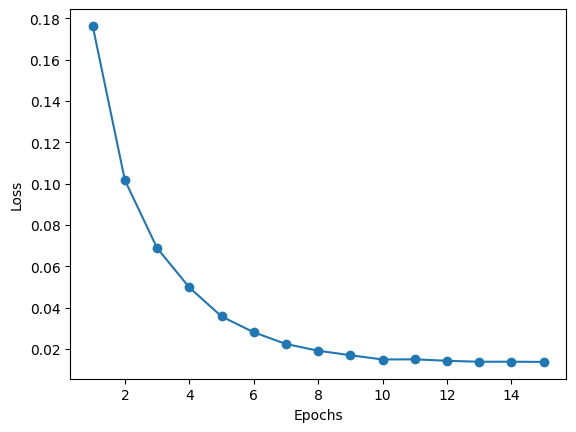

In [72]:
from datetime import datetime

ada = AdalineSTG(eta=0.001, n_iter=15)
start = datetime.now()
print(start)
ada.fit(X, y)


end = datetime.now()
print(end)
print("total time: ", end - start)

plt.plot(range(1, len(ada.losses_) + 1), ada.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



